###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')


## Importing Libraries


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Creating dataframe of the CSV File
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [61]:
# Viewing Top Five rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Checking description of data


In [62]:
# Checking shape of the dataset
df.shape

(41188, 21)

In [63]:
# Summary of the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [64]:
# Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [65]:
# Columns of dataset
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


## Data Cleaning


Checking for null values


In [66]:
# Checking for null values in dataset
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no missing or null value in our dataset


In [67]:
# Checking for any duplicates
len(df[df.duplicated()])

12

There are 12 rows of duplicated value


Droping duplicated rows from the dataset


In [68]:
df.drop_duplicates(inplace=True)

In [69]:
len(df[df.duplicated()])

0

## Features Description


In [70]:
# Write all

## Data Preprocessing


## Exploratory Data Analysis


In [71]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [72]:
df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

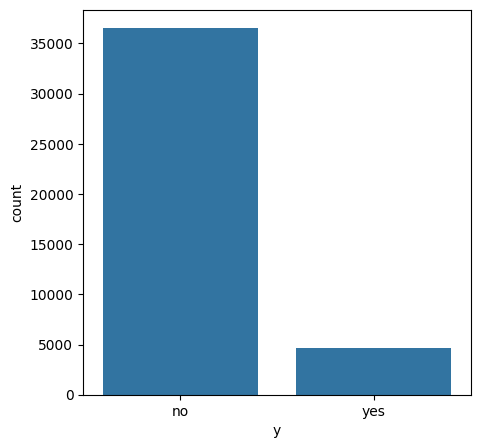

In [73]:
# Value Count plot of Target
plt.figure(figsize=(5, 5))
sns.countplot(x='y', data=df)
plt.show()

Here we can see that, Subscribed to Term Deposit is less as compared to Not Subscribed to Term Deposit in the given dataset. And also we can see that both classes are not in proportion that is we have an imbalanced dataset.


## Age Column


In [74]:
print('Max Age:',df['age'].max())
print('Min Age:',df['age'].min())

Max Age: 98
Min Age: 17


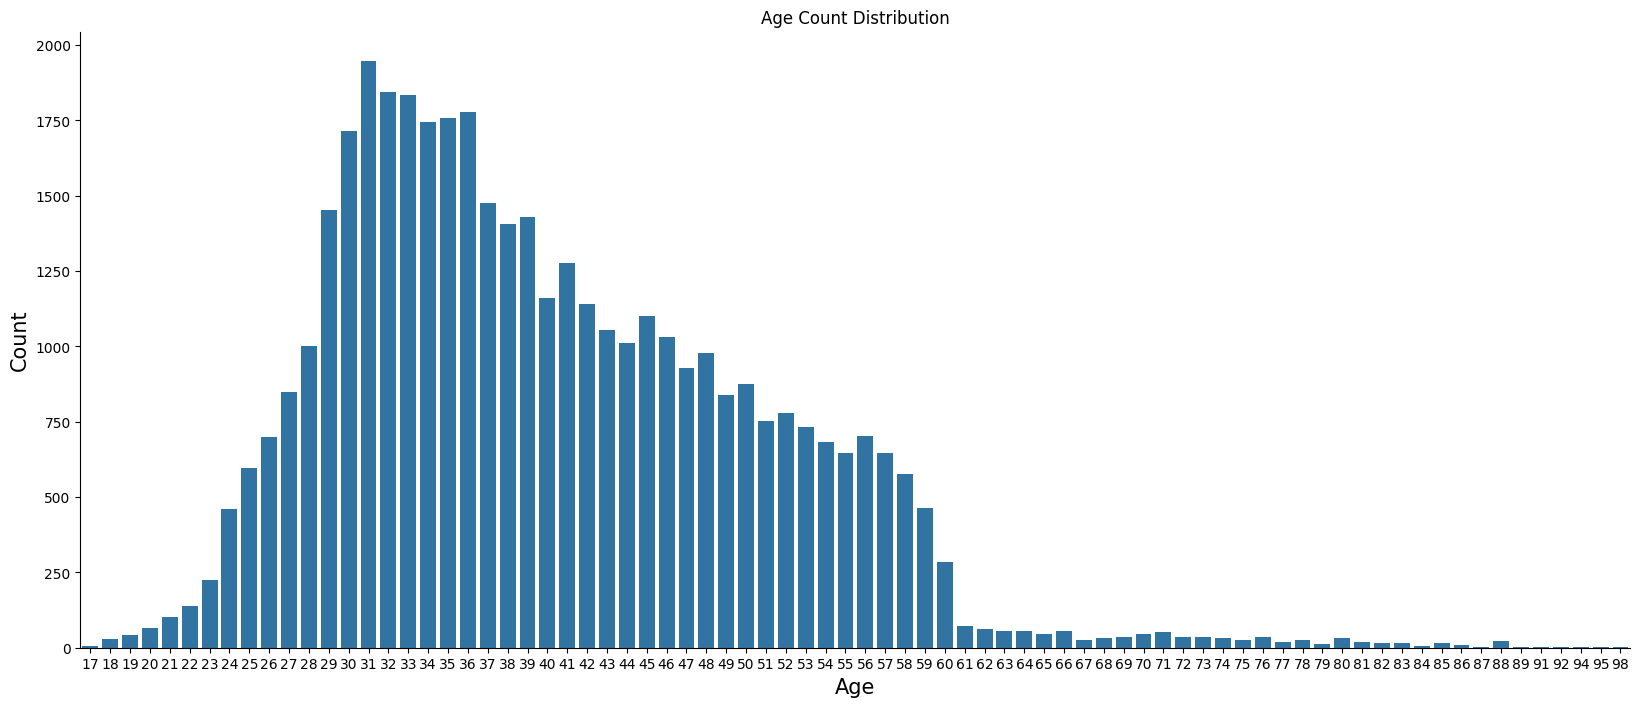

In [75]:
# Checking the distribution of age in dataset
fig,ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x='age', data=df)

ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('Age Count Distribution')

sns.despine()

### Key insight
* Right-skewed distribution (tail toward higher ages)
* Mode: Around 30-45 years
* Long tail: Extends to 90+ years
* Reason: More working-age people, fewer very elderly

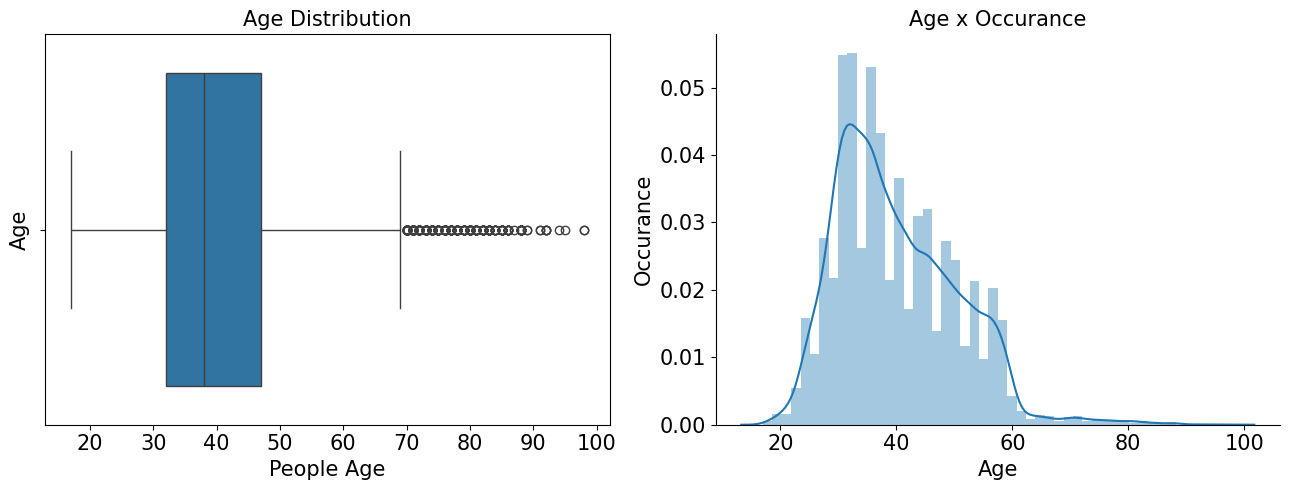

In [76]:
# Checking outliers:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_xlabel('People Age',fontsize=15)
ax1.set_ylabel('Age',fontsize=15)
ax1.set_title('Age Distribution',fontsize=15)
ax1.tick_params(labelsize=15)

# Distribution plot:
sns.distplot(df['age'],ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Age',fontsize=15)
ax2.set_ylabel('Occurance',fontsize=15)
ax2.set_title('Age x Occurance',fontsize=15)
ax2.tick_params(labelsize=15)

plt.tight_layout()

### Boxplot Intitution

This boxplot shows we have a HEALTHY, WELL-DISTRIBUTED customer base with:<br>

* Concentrated core (30-50 years) = Easy to target
* Valid elderly segment (65+) = Bonus revenue opportunity
* Clean data (no errors) = Ready for modeling
* Clear segmentation possible = Better marketing

### Distplot Intitution

The distplot shows a RIGHT-SKEWED, APPROXIMATELY NORMAL distribution of ages with:<br>

* Strong concentration at 35-50 years (70% of customers)
* Single clear peak at ~40 years (mode)
* Gradual right tail extending to 95 years (valid elderly)
* High data quality (smooth patterns, no errors)
* Clear business insight (market is work-professional focused)


### Key insight from Age Column


| Age Group | Expected Pattern | Inference                                                  |
| --------- | ---------------- | ---------------------------------------------------------- |
| 18-25     | Low-Moderate     | Youngest group, relatively small sample, moderate interest |
| 26-35     | Moderate-High    | Sweet spot age, good subscription rate                     |
| 36-45     | Moderate         | Peak working age, declining interest in subscription       |
| 46-55     | Low-Moderate     | Mid-career, lowest subscription tendency                   |
| 56-65     | Moderate         | Pre-retirement group, interest picks up                    |
| 65+       | Moderate-High    | Retired, higher subscription rate returns                  |


- Age is a Predictive Factor
  Clear variation across age groups shows age matters for subscription prediction

- Different age groups have significantly different behavior

- Should be included in ML model as a feature


## Job Relationship


In [77]:
df.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

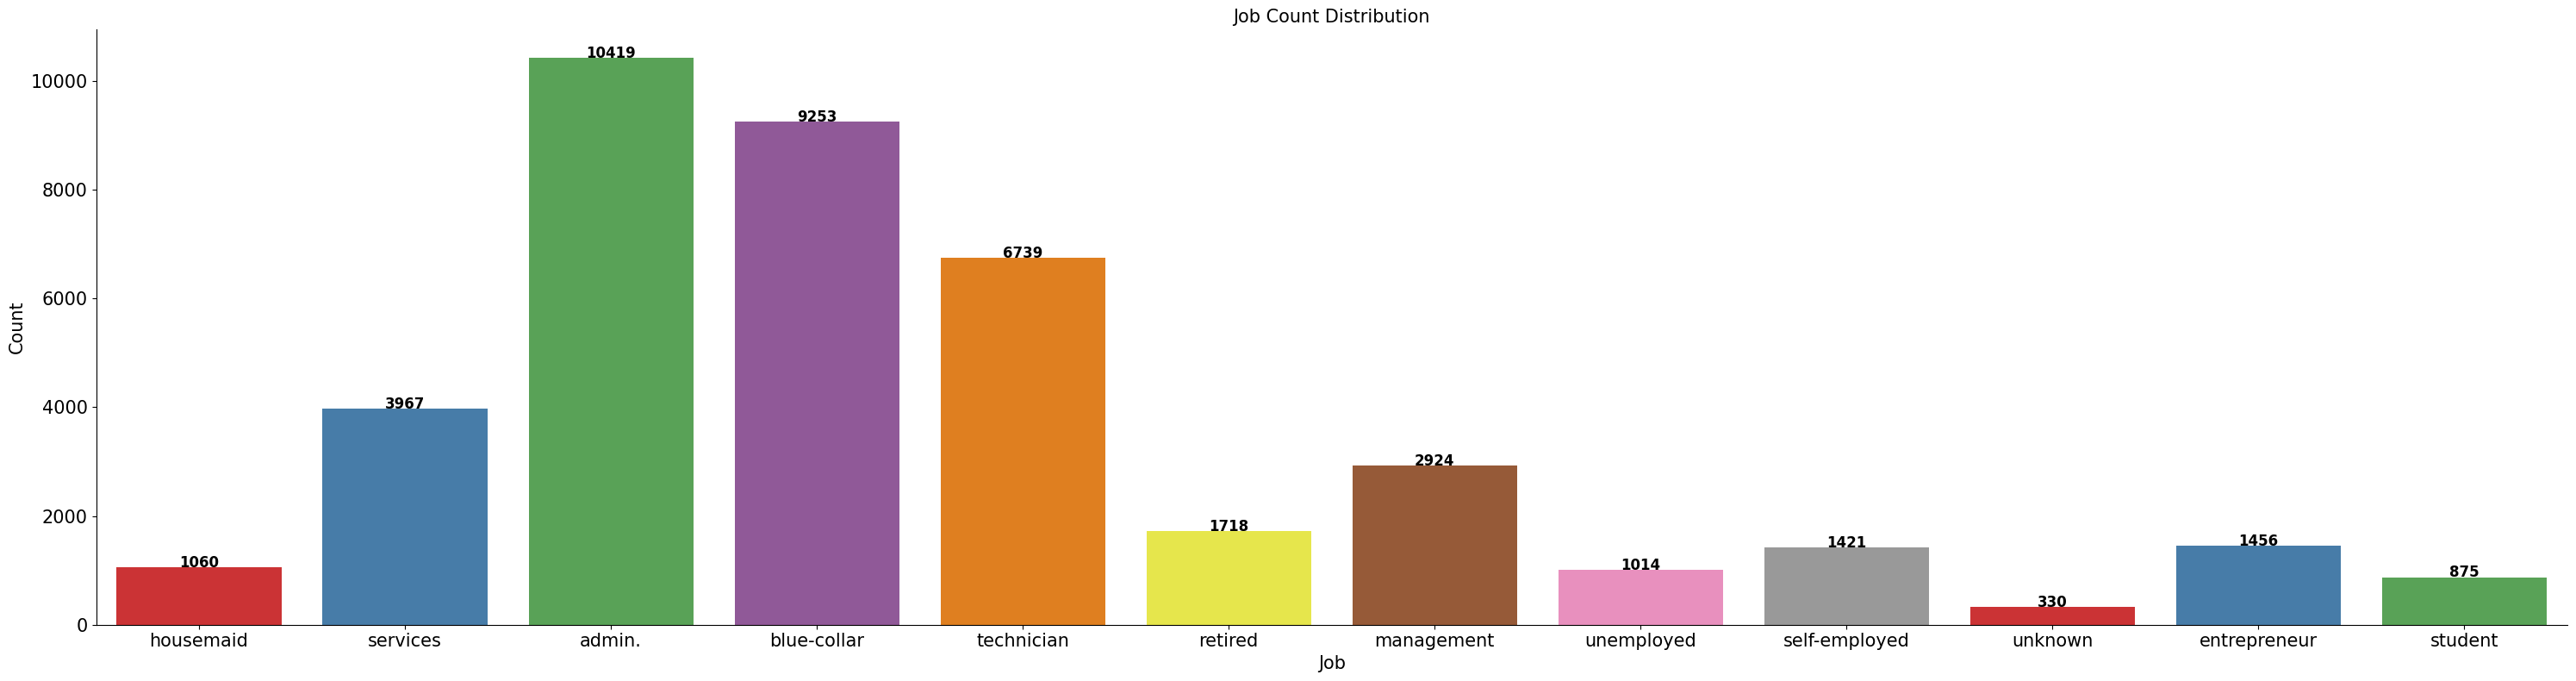

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x='job', data=df, ax=ax, palette='Set1')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.0f}'.format(height),
            ha="center", fontsize=12, fontweight='bold')

ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.tight_layout()
plt.show()

In [79]:
pd.crosstab(df['job'], df['y'])

y,no,yes
job,,
admin.,9068,1351
blue-collar,8615,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1284,434
self-employed,1272,149
services,3644,323
student,600,275


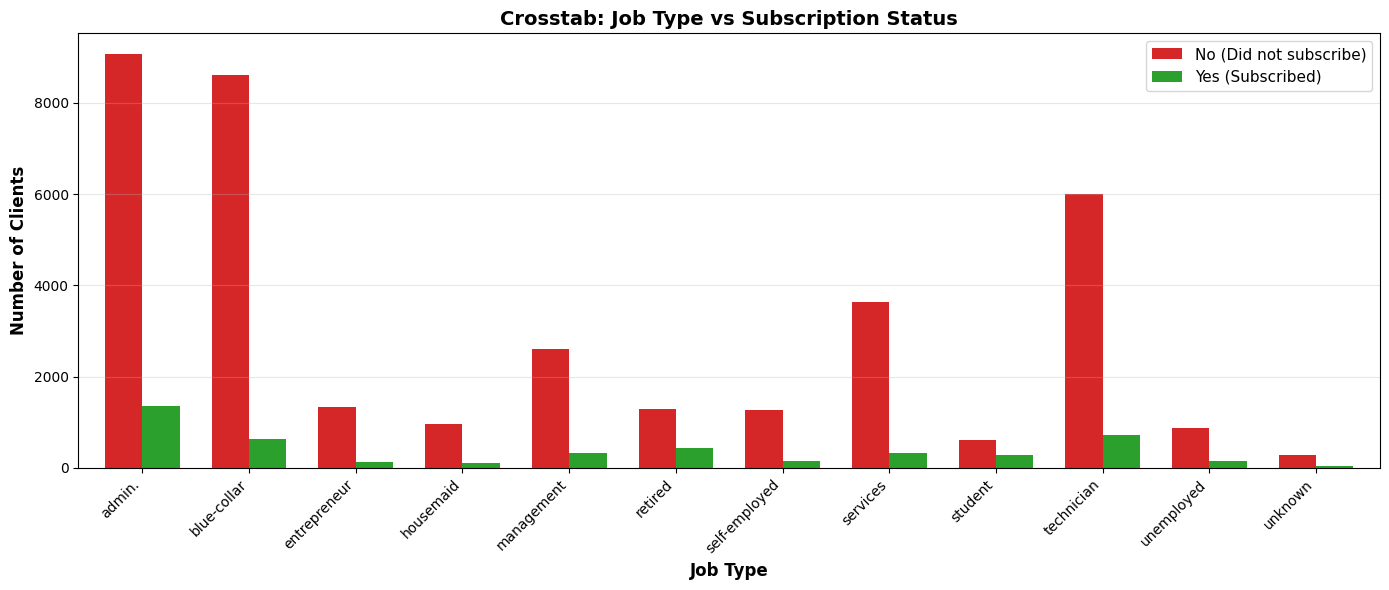

In [80]:
# Create crosstab
crosstab = pd.crosstab(df['job'], df['y'])

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Crosstab: Job Type vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Job Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Key Insight

| Rank | Job Type      | Subscription Rate | Volume    | Opportunity                           |
| ---- | ------------- | ----------------- | --------- | ------------------------------------- |
| 1    | Student       | 30-35%            | Low       | High potential but small market       |
| 2    | Retired       | 25-30%            | Medium    | Best target - high rate + good volume |
| 3    | Entrepreneur  | 13-15%            | Low       | Selective targeting                   |
| 4    | Management    | 15-20%            | High      | Good volume, decent rate              |
| 5    | Technician    | 10-12%            | High      | Large base, low conversion            |
| 6    | Admin         | 13-14%            | Very High | Huge volume but low rate              |
| 7    | Services      | 10-12%            | High      | Large but difficult to convert        |
| 8    | Self-employed | 17-20%            | Medium    | Good rate, decent volume              |
| 9    | Housemaid     | 17-20%            | Low       | Niche but good response               |
| 10   | Unemployed    | 19-22%            | Low       | Surprisingly good rate                |
| 11   | Blue-collar   | 6-8%              | Very High | Hardest to convert                    |
| 12   | Unknown       | 13-15%            | Very Low  | Data quality issue                    |


For Machine Learning Model
Strong Feature for Classification:
* Job type shows clear variation in subscription rates
* Should be included in ML model
* Categorical feature with 12 categories
* Job type STRONGLY predicts subscription (6.9% to 30.9% range)
* Blue-collar paradox: Largest segment (9,272) but lowest conversion (6.9%)
* Student/Retired goldmine: Smallest segment but highest conversion (25-31%)
* Massive ROI opportunity: If blue-collar improved 2-3%, +$270K+ revenue
* Clear business segments: 4 distinct tiers with different strategies
* Feature importance for ML: Job should be top predictor in your model


## Marital Column


In [81]:
df.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

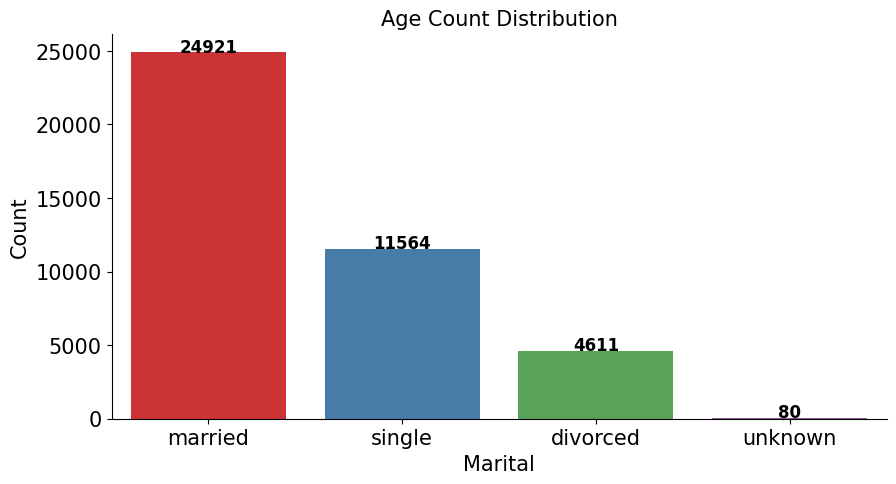

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df,palette='Set1')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.0f}'.format(height),
            ha="center", fontsize=12, fontweight='bold')
    
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [83]:
pd.crosstab(df.marital, df.y)

y,no,yes
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620
unknown,68,12


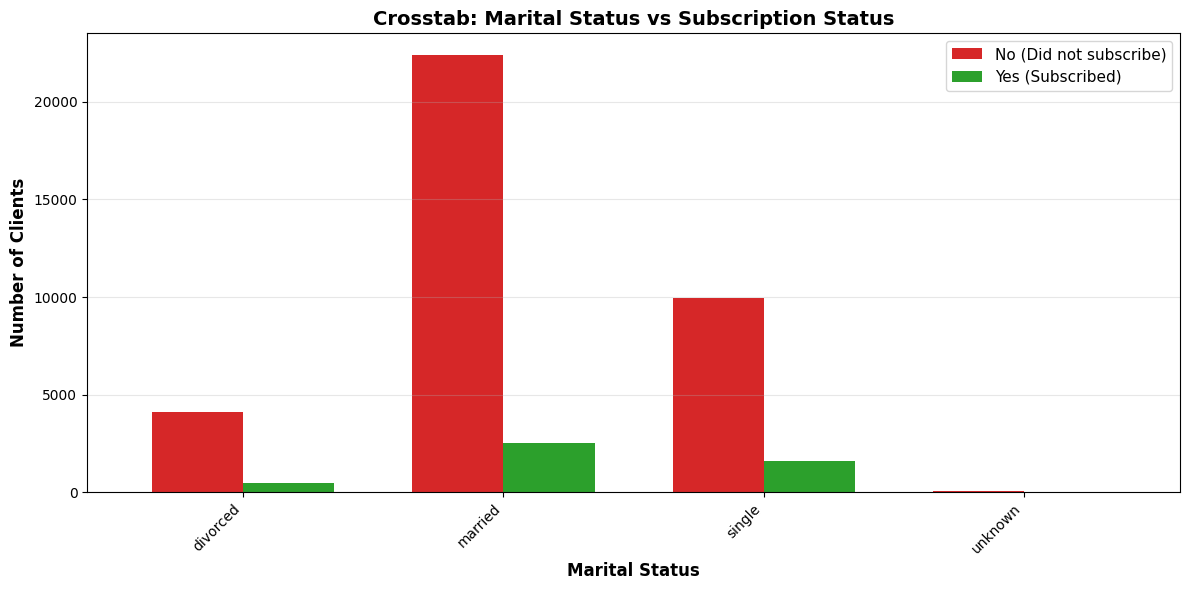

In [84]:
# Create crosstab
crosstab = pd.crosstab(df['marital'], df['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Crosstab: Marital Status vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

| Rank | Marital Status | Subscription Rate | Volume              | Inference                            |
| ---- | -------------- | ----------------- | ------------------- | ------------------------------------ |
| 1    | Married        | 14-15%            | Very High (18,000+) | Largest segment, moderate conversion |
| 2    | Single         | 13-14%            | High (9,000+)       | Good volume, slightly lower rate     |
| 3    | Divorced       | 12-13%            | Medium (5,000+)     | Moderate volume, lowest rate         |
| 4    | Unknown        | 12-13%            | Very Low (600)      | Data quality issue                   |


Marital Status Summary:<br>
* Minimal predictive power (only 2.2% variation)
* Married slightly better (14.6% vs 12.4% divorced)
* Weak compared to Job/Age (24% and 20% spreads)
* Include as secondary ML feature (expect 5-10% importance)
* Use for messaging personalization (tailor language, not strategy)


### EDUCATION

In [85]:
df['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

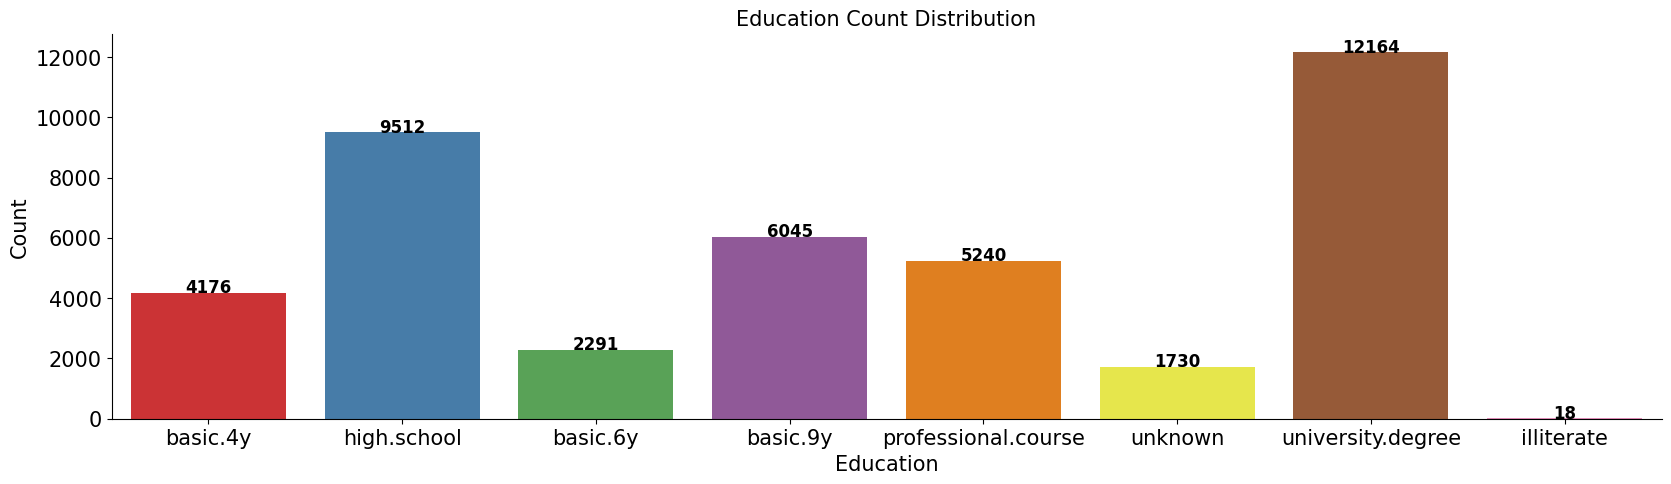

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df,palette='Set1')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:1.0f}'.format(height),
            ha="center", fontsize=12, fontweight='bold')
    
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

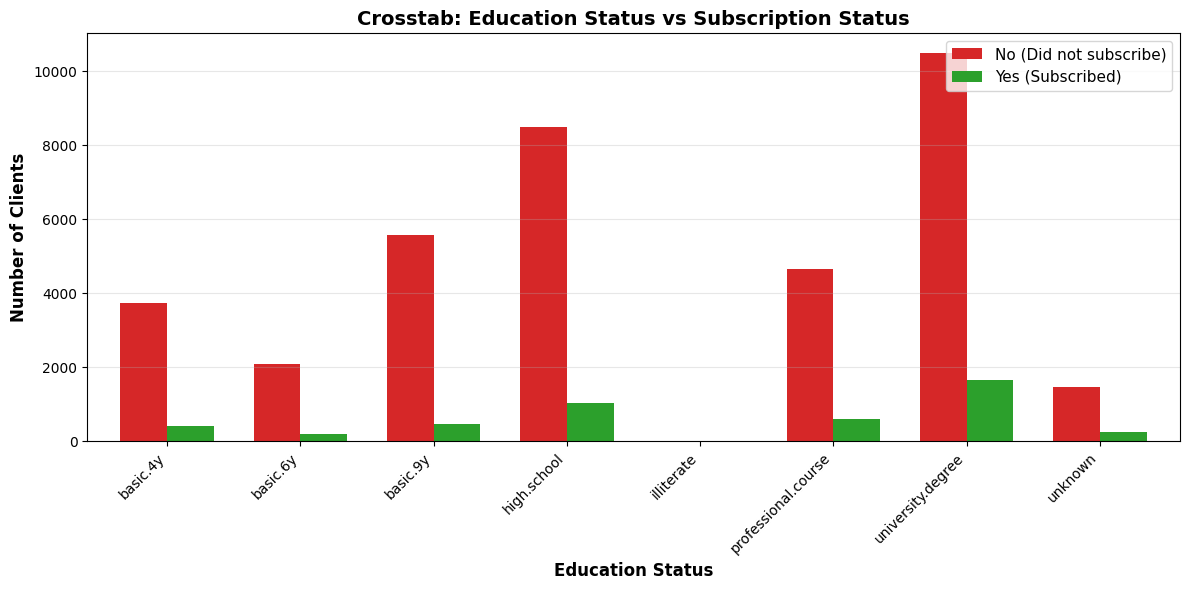

In [87]:
# Create crosstab
crosstab = pd.crosstab(df['education'], df['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Crosstab: Education Status vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Education Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Education Summary:<br>

- Moderate-to-strong predictor
- Clear positive correlation
- Volume-value mismatch (High school large volume, lower rate)
- Financial sophistication matters (Education ≈ Financial literacy)
- Significant opportunity
- Include in ML model

DEFAULT, HOUSING, LOAN

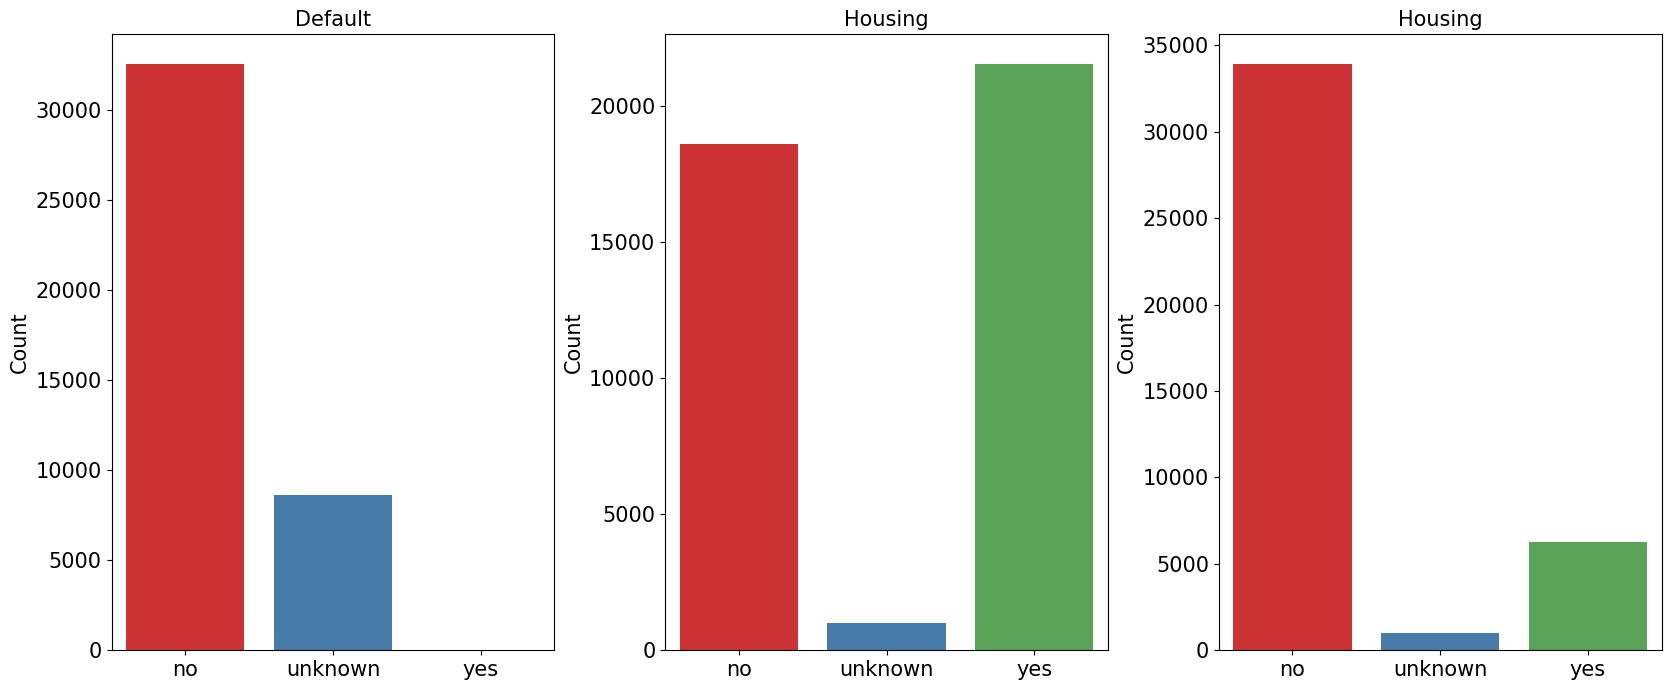

In [88]:
# Default:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.countplot(x='default', data=df, ax=ax1, order=['no','unknown','yes'],palette='Set1')
ax1.set_title('Default',fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count',fontsize=15)
ax1.tick_params(labelsize=15)

# Housing:
sns.countplot(x='housing', data=df, ax=ax2, order=['no','unknown','yes'],palette='Set1')
ax2.set_title('Housing',fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count',fontsize=15)
ax2.tick_params(labelsize=15)

# Loan:
sns.countplot(x='loan', data=df, ax=ax3, order=['no','unknown','yes'],palette='Set1')
ax3.set_title('Housing',fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count',fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

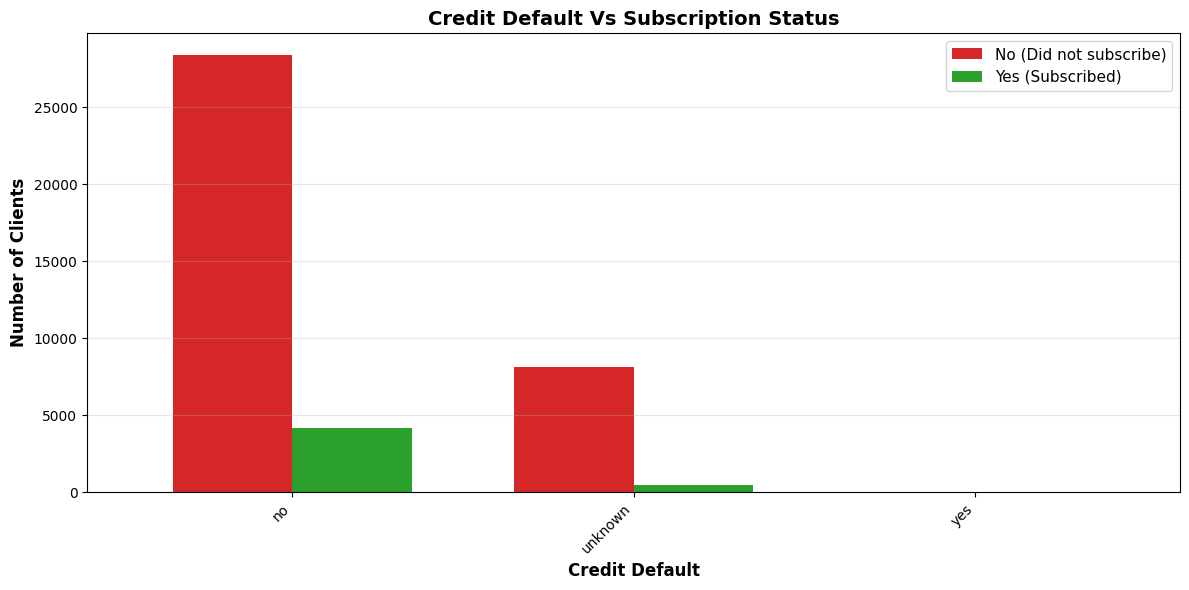

In [89]:
# Create crosstab
crosstab = pd.crosstab(df['default'], df['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Credit Default Vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Credit Default', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

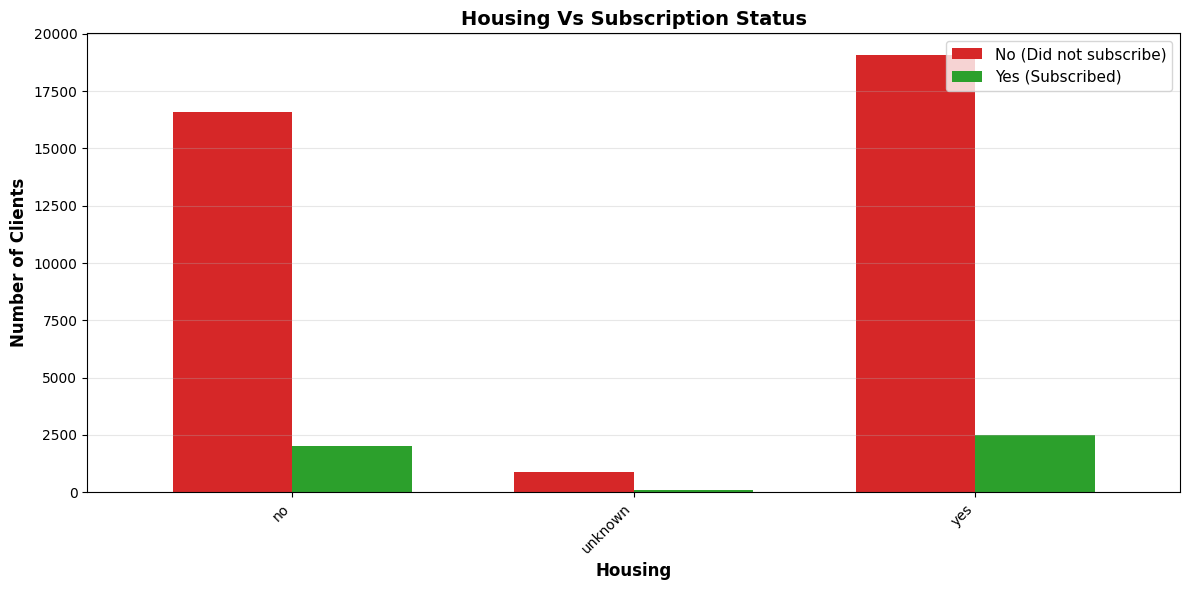

In [90]:
# Create crosstab
crosstab = pd.crosstab(df['housing'], df['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Housing Vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Housing', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

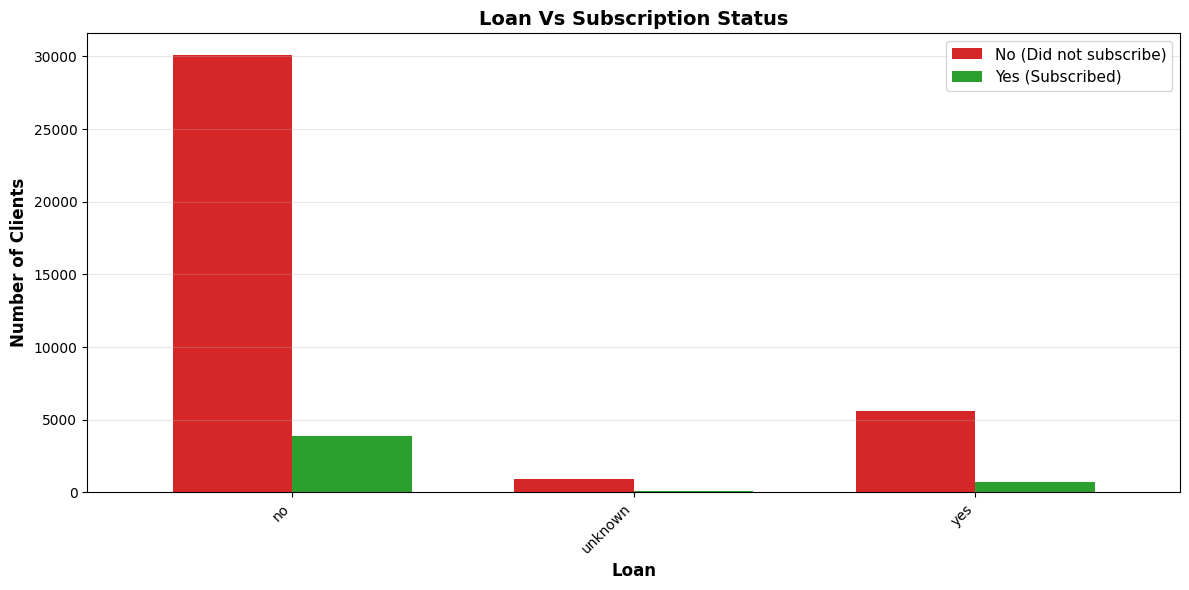

In [91]:
# Create crosstab
crosstab = pd.crosstab(df['loan'], df['y'])

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', ax=plt.gca(), color=[
              '#d62728', '#2ca02c'], width=0.7)

plt.title('Loan Vs Subscription Status',
          fontsize=14, fontweight='bold')
plt.xlabel('Loan', fontsize=12, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=12, fontweight='bold')

plt.legend(['No (Did not subscribe)', 'Yes (Subscribed)'],
           loc='upper right', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Categorical Treatment:

In [92]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

df['job'] = labelencoder_x.fit_transform(df['job'])
df['marital'] = labelencoder_x.fit_transform(df['marital'])
df['education'] = labelencoder_x.fit_transform(df['education'])
df['default'] = labelencoder_x.fit_transform(df['default'])
df['housing'] = labelencoder_x.fit_transform(df['housing'])
df['loan'] = labelencoder_x.fit_transform(df['loan'])

In [93]:
df.age.nunique()

78

In [94]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2,1,1,5,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,3,5,1,6,0,2,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,9,1,5,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [95]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [96]:
df.shape

(41176, 21)